## Setup

In [1]:
from UTILITY_quickstart import *  
from tabulate import tabulate


importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline2.yml")  

#New DL10 centering 
importedDefaultSettings = importedDefaultSettings | {"centerDL10" : True}

#Disable BC14 centering
importedDefaultSettings = importedDefaultSettings | { "centerBC14" : False }

In [2]:
csrTF = False #This config is intended for use with CSR on... but for speed, running this notebook with it off
transverseWakes = False #Initially disabling for faster computation

evalElement = "BEGBC20"   
inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"] 
bunchCount = importedDefaultSettings["bunchCount"] 

tao = initializeTao(     
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,          
    csrTF = csrTF,     
    numMacroParticles=1e3,     
    scratchPath = "/tmp",     
    randomizeFileNames = True,      
    transverseWakes = transverseWakes 
)


totalNumElements = len(tao.lat_list("*", "ele.name"))

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 1000.0
Beam created, written to /tmp/beams/activeBeamFile_1794653224342482734.h5, and reinit to tao


In [3]:
# For simplicity, disable all apertures. Very nonphysical, but the single particle tracking failure is causing problems

# for eleII in range(totalNumElements):
#     try:
#         tao.cmd(f"set ele {eleII} APERTURE_AT = NO_APERTURE")
#     except:
#         pass

In [4]:
trackBeam(tao, 
          trackEnd = "L0BFEND", 
          verbose = True
         ) 
PInit = getBeamAtElement(tao, "L0AFEND")

artificialFactor = 1.3 
#artificialFactor = 1.0 
PInit.x = artificialFactor * PInit.x 
PInit.px = artificialFactor * PInit.px 
PInit.y = artificialFactor * PInit.y 
PInit.py = artificialFactor * PInit.py  

makeBeamActiveBeamFile(PInit, tao = tao)

Loaded /tmp/beams/activeBeamFile_1794653224342482734.h5
Set track_start = L0AFEND, track_end = L0BFEND
Tracking!
trackBeam() exiting


In [5]:
# tao.lat_list("Q*", "ele.name", flags="-no_slaves") 
# Manually pared list of only "normal" quads in L1, L2, and L3
linacQuads = [
    'QM10771', 'QM10781', 'QA11132', 'Q11201', 'QA11265', 'Q11301', 
    'QM11393', 'Q11401', 'Q11501', 'Q11601', 'Q11701', 'Q11801', 'Q11901', 'Q12201', 'Q12301', 'Q12401', 'Q12501', 'Q12601', 'Q12701', 'Q12801', 'Q12901', 'Q13201', 'Q13301', 'Q13401', 'Q13501', 'Q13601', 'Q13701', 'Q13801', 'Q13901', 'Q14201', 'Q14301', 'Q14401', 'Q14501', 'Q14601', 'Q14701', 'QM14715',
    'QM14891', 'Q14901', 'Q15201', 'Q15301', 'Q15401', 'Q15501', 'Q15601', 'Q15701', 'Q15801', 'Q15901', 'Q16201', 'Q16301', 'Q16401', 'Q16501', 'Q16601', 'Q16701', 'Q16801', 'Q16901', 'Q17201', 'Q17301', 'Q17401', 'Q17501', 'Q17601', 'Q17701', 'Q17801', 'Q17901', 'Q18201', 'Q18301', 'Q18401', 'Q18501', 'Q18601', 'Q18701', 'Q18801', 'Q18901', 'Q19201', 'Q19301', 'Q19401', 'Q19501', 'Q19601', 'Q19701', 'Q19801', 'Q19851', 'Q19871'
]

#quadsToPerturb = linacQuads

#To accommodate 2014 BBA data, pick subset from z = 1100 to 1800
quadsToPerturb = [
    'Q11801', 'Q11901', 'Q12201', 'Q12301', 'Q12401', 'Q12501', 'Q12601', 'Q12701', 'Q12801', 'Q12901', 'Q13201', 'Q13301', 'Q13401', 'Q13501', 'Q13601', 'Q13701', 'Q13801', 'Q13901', 'Q14201', 'Q14301', 'Q14401', 'Q14501', 'Q14601', 'Q14701', 'QM14715',
    'QM14891', 'Q14901', 'Q15201', 'Q15301', 'Q15401', 'Q15501', 'Q15601', 'Q15701', 'Q15801', 'Q15901', 'Q16201', 'Q16301', 'Q16401', 'Q16501', 'Q16601', 'Q16701', 'Q16801', 'Q16901', 'Q17201', 'Q17301', 'Q17401', 'Q17501', 'Q17601', 'Q17701', 'Q17801', 'Q17901', 'Q18201', 'Q18301', 'Q18401', 'Q18501', 'Q18601', 'Q18701', 'Q18801', 'Q18901', 'Q19201', 'Q19301', 'Q19401', 'Q19501', 'Q19601', 'Q19701'
]

In [6]:
import json

# quadZValues = { ele : tao.ele_floor(ele)["Actual"][2] for ele in quadsToPerturb }

# with open("./quadZValues.json", "w") as f:
#     json.dump(quadZValues, f, indent=2)

#Generated with "2025-05-12 Processing real BBA data from 2014.nb"
#These are in [mm]!
with open('pinkCurveXOffsets.json', 'r') as file:
    pinkCurveXOffsets = json.load(file)

with open('pinkCurveYOffsets.json', 'r') as file:
    pinkCurveYOffsets = json.load(file)

# print(pinkCurveXOffsets)
# print(pinkCurveYOffsets)

## Baseline

In [7]:
setLattice(tao, **importedDefaultSettings)

trackBeam(tao, 
          trackEnd = evalElement,
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_1794653224342482734.h5
Set track_start = L0AFEND, track_end = BEGBC20
Set track_end = ENDDL10
Tracking!
Beam centered at ENDDL10 written to /tmp/beams/patchBeamFile_1794653224342482734.h5
Loaded /tmp/beams/patchBeamFile_1794653224342482734.h5
Set track_start = ENDDL10, track_end = BEGBC20
Tracking!
trackBeam() exiting


In [8]:
activeData = {}
for activeEle in  [ "PR10571", "WS12214", "BEGBC14_1", "ENDBC14_2", "BEGBC20" ]:
    # print(activeEle)
    # print(f"""{getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6:.2f}, {getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6:.2f}""")
    # print()
    activeData[f"{activeEle}_x"] = getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6
    activeData[f"{activeEle}_y"] = getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6

printableData = { key : f"""{activeData[key]:.2f}""" for key in activeData.keys() }

print(tabulate([
    ["PR10571",                  printableData["PR10571_x"], printableData["PR10571_y"]], 
    ["WS12214",                  printableData["WS12214_x"], printableData["WS12214_y"]],
    ["BEGBC14",                  printableData["BEGBC14_1_x"], printableData["BEGBC14_1_y"]],
    ["ENDBC14",                  printableData["ENDBC14_2_x"], printableData["ENDBC14_2_y"]],
    ["BEGBC20\n(L3 wire proxy)", printableData["BEGBC20_x"], printableData["BEGBC20_y"]]
], 
["90% RMS\nemittance (not\nSI90!) [um-rad]", "\n     X     ", "\n     Y     "], 
tablefmt="grid"))

+-------------------+---------------+---------------+
| 90% RMS           |               |               |
| emittance (not    |        X      |        Y      |
| SI90!) [um-rad]   |               |               |
+===================+===============+===============+
| PR10571           |          3.72 |          2.93 |
+-------------------+---------------+---------------+
| WS12214           |          4.04 |          2.82 |
+-------------------+---------------+---------------+
| BEGBC14           |          4.43 |          2.77 |
+-------------------+---------------+---------------+
| ENDBC14           |          4.71 |          2.73 |
+-------------------+---------------+---------------+
| BEGBC20           |          4.85 |          4.26 |
| (L3 wire proxy)   |               |               |
+-------------------+---------------+---------------+


## Steering optimizer functions

In [9]:
from scipy.optimize import minimize



combinedElementData = [
    {
        "eleII" : eleII,
        "name" : tao.ele_head(eleII)["name"],
        "key" : tao.ele_head(eleII)["key"],
        "s" : tao.ele_head(eleII)["s"]
    }
    for eleII in range(totalNumElements) 
]

#Keep only elements after L0AFEND
combinedElementData = [ele for ele in combinedElementData if ele["s"] > 4.1274477]

allHKickerNames = [ele["name"] for ele in combinedElementData if ele["key"] == "HKicker"]
allVKickerNames = [ele["name"] for ele in combinedElementData if ele["key"] == "VKicker"]

#Manually picking a list of elements that seem like BPMs. Fast and dirty, DNT
#[ele["name"] for ele in combinedElementData if ele["key"] == "Monitor"]
#allBPMNames = ['BPM10371', 'BPM10425', 'BPM10511', 'BPM10525',  'BPM10581', 'BPM10631', 'BPM10651', 'BPM10731', 'BPM10771', 'BPM10781', 'BPM11132', 'BPM11201', 'BPM11265', 'BPM11301', 'BPM11312', 'BPM11333', 'BPM11358', 'BPM11362', 'BPM11393', 'BPM11401', 'BPM11501', 'BPM11601', 'BPM11701', 'BPM11801', 'BPM11901', 'BPM12201', 'BPM12301', 'BPM12401', 'BPM12501', 'BPM12601', 'BPM12701', 'BPM12801', 'BPM12901', 'BPM13201', 'BPM13301', 'BPM13401', 'BPM13501', 'BPM13601', 'BPM13701', 'BPM13801', 'BPM13901', 'BPM14201', 'BPM14301', 'BPM14401', 'BPM14501', 'BPM14601', 'BPM14701', 'BPM14715', 'BPM14801', 'BPM14891', 'BPM14901', 'BPM15201', 'BPM15301', 'BPM15401', 'BPM15501', 'BPM15601', 'BPM15701', 'BPM15801', 'BPM15901', 'BPM16201', 'BPM16301', 'BPM16401', 'BPM16501', 'BPM16601', 'BPM16701', 'BPM16801', 'BPM16901', 'BPM17201', 'BPM17301', 'BPM17401', 'BPM17501', 'BPM17601', 'BPM17701', 'BPM17801', 'BPM17901', 'BPM18201', 'BPM18301', 'BPM18401', 'BPM18501', 'BPM18601', 'BPM18701', 'BPM18801', 'BPM18901', 'BL18900', 'BPM19201', 'BPM19301', 'BPM19401', 'BPM19801', 'BPM19851', 'BPM19871', 'M1E', 'M3E', 'MS2EL', 'M4E', 'M5E', 'M6E', 'M7E', 'M8E', 'MS2ER', 'M9E', 'M11E', 'M1FF', 'M2FF', 'M3FF', 'M4FF', 'M5FF', 'M0EX', 'M1EX', 'M2EX', 'M3EX']

#For this notebook only, steer to centers of quads instead of BPMs
#BEWARE!!! Horrible misnomer!!!
allBPMNames = quadsToPerturb




######################################
#Optional: Limit kickers and BPMs by s
######################################

optimizerBPMSMin = 100
optimizerBPMSMax = 905
optimizerKickerSMin = optimizerBPMSMin - 20 #Go a bit upstream from first BPM considered
optimizerKickerSMax = optimizerBPMSMax


allBPMNames     = [ ele for ele in allBPMNames     if optimizerBPMSMin    < tao.ele_head(ele)["s"] < optimizerBPMSMax   ]
allHKickerNames = [ ele for ele in allHKickerNames if optimizerKickerSMin < tao.ele_head(ele)["s"] < optimizerKickerSMax]
allVKickerNames = [ ele for ele in allVKickerNames if optimizerKickerSMin < tao.ele_head(ele)["s"] < optimizerKickerSMax]




In [10]:
def xSetter(tao, params):
    #Prevent recalculation until changes are made
    tao.cmd("set global lattice_calc_on = F")
    
    for eleII in range(len(allHKickerNames)):
        setKickerkG(tao, allHKickerNames[eleII], params[eleII])
    
    #Reenable lattice calculations
    tao.cmd("set global lattice_calc_on = T")

def xObjective(params, tao):
    
    try:
        xSetter(tao, params)

        trackBeam(tao, 
          trackEnd = evalElement,
          **importedDefaultSettings,
         )
    
    except: #If Bmad doesn't like the proposed solution, don't crash, give a bad number
        return 1e20


    emitError = getBeamAtElement(tao, evalElement).twiss(plane = "x", fraction = 0.9)["norm_emit_x"]

    
    #Optionally give a very slight preference to solutions that don't move the magnets very much
    moveError = 1e-6 * np.sum( (params) ** 2 ) 

    
    print(emitError, moveError, emitError + moveError )
    
    return emitError + moveError

def xSolver(tao):

    bounds = [ (-0.2, 0.2) for ele in allHKickerNames ] 
    initialGuess = [ 0 for ele in allHKickerNames ] 

    # numDimensions = len(initialGuess)
    # initialSimplex = np.tile(initialGuess, (numDimensions + 1, 1))
    # for i in range (1, numDimensions + 1):
    #     #initialSimplex[i][i-1] += 0.25 * (bounds[i-1][1] - bounds[i-1][0])
    #     initialSimplex[i][i-1] = 0.25
    
    result = minimize(
        xObjective, 
        initialGuess, 
        method='Nelder-Mead',
        #method = "L-BFGS-B",
        #method = "Powell",
        bounds = bounds,
        args = (tao,),
        options={'adaptive': True, "disp" : True}
        #options = { "initial_simplex": initialSimplex, "adaptive": False, "disp" : True }
    )

    
    return result

## Pink curve error

In [11]:
quadsToPerturbSValues = [ tao.ele_head(ele)["s"] for ele in quadsToPerturb ] 

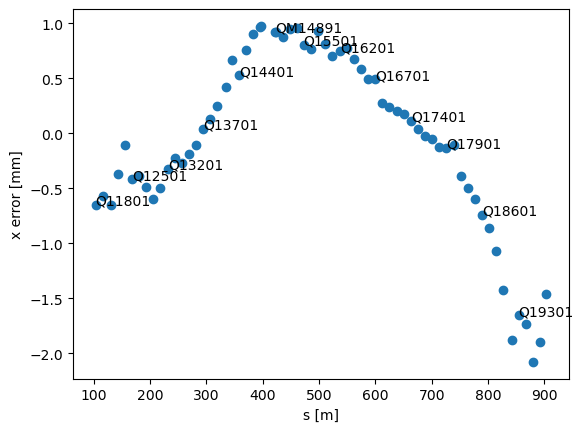

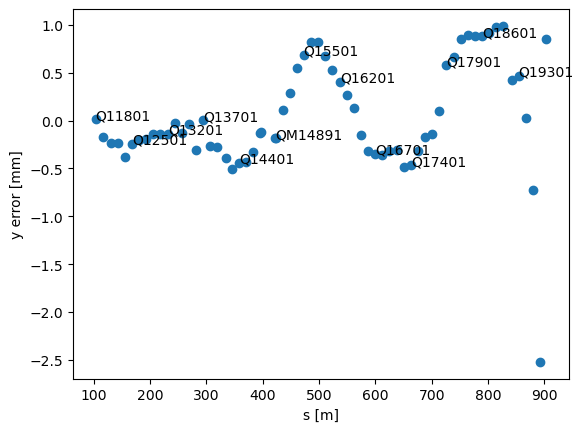

In [12]:

quadPerturbValues = [ 1e-3 * pinkCurveXOffsets[ele] for ele in quadsToPerturb]



fig, ax = plt.subplots()
ax.scatter(quadsToPerturbSValues, 1e3 * np.array(quadPerturbValues) )

for i, txt in enumerate(quadsToPerturb):
    if i % 5 == 0:
        ax.annotate(txt, (quadsToPerturbSValues[i], (1e3 * np.array(quadPerturbValues))[i]))

ax.set_xlabel("s [m]")
ax.set_ylabel("x error [mm]")

plt.show()









quadPerturbValues = [ 1e-3 * pinkCurveYOffsets[ele] for ele in quadsToPerturb]

fig, ax = plt.subplots()
ax.scatter(quadsToPerturbSValues, 1e3 * np.array(quadPerturbValues) )

for i, txt in enumerate(quadsToPerturb):
    if i % 5 == 0:
        ax.annotate(txt, (quadsToPerturbSValues[i], (1e3 * np.array(quadPerturbValues))[i]))

ax.set_xlabel("s [m]")
ax.set_ylabel("y error [mm]")

plt.show()

In [13]:
offsetMult = 1

#Prevent recalculation until changes are made
tao.cmd("set global lattice_calc_on = F")

for ele in pinkCurveXOffsets.keys():
    #print(f"set ele {ele} X_OFFSET = {offsetMult * 1e-3 * pinkCurveXOffsets[ele]}")
    tao.cmd(f"set ele {ele} X_OFFSET = {offsetMult * 1e-3 * pinkCurveXOffsets[ele]}")

for ele in pinkCurveYOffsets.keys():
    #print(f"set ele {ele} Y_OFFSET = {offsetMult * 1e-3 * pinkCurveYOffsets[ele]}")
    tao.cmd(f"set ele {ele} Y_OFFSET = {offsetMult * 1e-3 * pinkCurveYOffsets[ele]}")

#Prevent recalculation until changes are made
tao.cmd("set global lattice_calc_on = T")

['tao_single_track: particle lost in single particle tracking at branch>>element 0>>1333: S1EL#2  [s =   943.41]']

In [14]:
setLattice(tao, **importedDefaultSettings)

trackBeam(tao, 
          trackEnd = evalElement,
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_1794653224342482734.h5
Set track_start = L0AFEND, track_end = BEGBC20
Set track_end = ENDDL10
Tracking!
Beam centered at ENDDL10 written to /tmp/beams/patchBeamFile_1794653224342482734.h5
Loaded /tmp/beams/patchBeamFile_1794653224342482734.h5
Set track_start = ENDDL10, track_end = BEGBC20
Tracking!
trackBeam() exiting


In [15]:
activeData = {}
for activeEle in  [ "PR10571", "WS12214", "BEGBC14_1", "ENDBC14_2", "BEGBC20" ]:
    # print(activeEle)
    # print(f"""{getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6:.2f}, {getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6:.2f}""")
    # print()
    activeData[f"{activeEle}_x"] = getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6
    activeData[f"{activeEle}_y"] = getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6
    activeData[f"{activeEle}_charge"] = getBeamAtElement(tao, activeEle).charge * 1e9

printableData = { key : f"""{activeData[key]:.2f}""" for key in activeData.keys() }

In [16]:
print(tabulate([
    ["PR10571",                  printableData["PR10571_x"],    printableData["PR10571_y"]  , printableData["PR10571_charge"]   ], 
    ["WS12214",                  printableData["WS12214_x"],    printableData["WS12214_y"]  , printableData["WS12214_charge"]   ],
    ["BEGBC14",                  printableData["BEGBC14_1_x"],  printableData["BEGBC14_1_y"], printableData["BEGBC14_1_charge"] ],
    ["ENDBC14",                  printableData["ENDBC14_2_x"],  printableData["ENDBC14_2_y"], printableData["ENDBC14_2_charge"] ],
    ["BEGBC20\n(L3 wire proxy)", printableData["BEGBC20_x"],    printableData["BEGBC20_y"]  , printableData["BEGBC20_charge"]   ]
], 
["90% RMS\nemittance (not\nSI90!) [um-rad]", "\n     X     ", "\n     Y     ", "\n  Charge  "], 
tablefmt="grid"))

+-------------------+---------------+---------------+--------------+
| 90% RMS           |               |               |              |
| emittance (not    |        X      |        Y      |     Charge   |
| SI90!) [um-rad]   |               |               |              |
+===================+===============+===============+==============+
| PR10571           |          3.72 |          2.93 |          1.6 |
+-------------------+---------------+---------------+--------------+
| WS12214           |          8.1  |          5.22 |          1.6 |
+-------------------+---------------+---------------+--------------+
| BEGBC14           |         10.4  |          5.1  |          1.6 |
+-------------------+---------------+---------------+--------------+
| ENDBC14           |         10.5  |          5.08 |          1.6 |
+-------------------+---------------+---------------+--------------+
| BEGBC20           |         13.34 |          9.02 |          1.6 |
| (L3 wire proxy)   |             

### Steered

In [ ]:
resultX = xSolver(tao)

print("Optimization Results:")
print(f"Optimal Parameters: {resultX.x}")
print(f"Objective Function Value at Optimal Parameters: {resultX.fun}")
print(f"Number of Iterations: {resultX.nit}")
print(f"Converged: {resultX.success}")

xSetter(tao, resultX.x)

1.3310577239310394e-05 0.0 1.3310577239310394e-05
1.340674413071058e-05 6.25e-14 1.340674419321058e-05
1.33163487214946e-05 6.25e-14 1.33163487839946e-05
1.3367415978526631e-05 6.25e-14 1.3367416041026631e-05
1.364049643912127e-05 6.25e-14 1.364049650162127e-05
1.315255063918951e-05 6.25e-14 1.315255070168951e-05
1.32306689215852e-05 6.25e-14 1.32306689840852e-05
1.3305197406549609e-05 6.25e-14 1.3305197469049608e-05
1.3435191106535423e-05 6.25e-14 1.3435191169035423e-05
1.3339030859851789e-05 6.25e-14 1.3339030922351789e-05
1.345972681814892e-05 6.25e-14 1.345972688064892e-05
1.3462957715485607e-05 6.25e-14 1.3462957777985607e-05
1.3353114525895617e-05 6.25e-14 1.3353114588395617e-05
1.3349643603218523e-05 6.25e-14 1.3349643665718522e-05
1.3243810840980718e-05 6.25e-14 1.3243810903480718e-05
1.3117767354711821e-05 6.25e-14 1.311776741721182e-05
1.3592679360438984e-05 6.25e-14 1.3592679422938984e-05
1.3217625088725046e-05 6.25e-14 1.3217625151225046e-05
1.3494050773131647e-05 6.25e-14 

In [ ]:
setLattice(tao, **importedDefaultSettings)

trackBeam(tao, 
          trackEnd = evalElement,
          **importedDefaultSettings,
          verbose = True
         )

activeData = {}
for activeEle in  [ "PR10571", "WS12214", "BEGBC14_1", "ENDBC14_2", "BEGBC20" ]:
    # print(activeEle)
    # print(f"""{getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6:.2f}, {getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6:.2f}""")
    # print()
    activeData[f"{activeEle}_x"] = getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6
    activeData[f"{activeEle}_y"] = getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6

printableData = { key : f"""{activeData[key]:.2f}""" for key in activeData.keys() }

print(tabulate([
    ["PR10571",                  printableData["PR10571_x"], printableData["PR10571_y"]], 
    ["WS12214",                  printableData["WS12214_x"], printableData["WS12214_y"]],
    ["BEGBC14",                  printableData["BEGBC14_1_x"], printableData["BEGBC14_1_y"]],
    ["ENDBC14",                  printableData["ENDBC14_2_x"], printableData["ENDBC14_2_y"]],
    ["BEGBC20\n(L3 wire proxy)", printableData["BEGBC20_x"], printableData["BEGBC20_y"]]
], 
["90% RMS\nemittance (not\nSI90!) [um-rad]", "\n     X     ", "\n     Y     "], 
tablefmt="grid"))